<center><font size="16">**Titanic: Machine Learning from Disaster**</font></center>

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will see how to dig deep into the data and visualize it.

 [![TITANIC sinking](https://i.imgur.com/8Rmg0vy.jpg)](https://youtu.be/9xoqXVjBEF8 "TITANIC sinking")

### Data

The data has been split into two groups:

- titanic data (titanic_data.csv)
- competition data (competition.csv)

The tasks given to you will be performed on "competition.csv"

### Data Dictionary

<center>
<table class="table table-bordered">
<tr>
<th style="width:5%">Variable</th><th style="width:5%">Definition</th><th style="width:5%">Key</th>
</tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>
</center>

# <mark>Wrangling & EDA</mark>

# 1. <u>Loading Packages.</u>

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 2. <u>Loading Data & Basic Analysis</u>

In [311]:
data = pd.read_csv('data/titanic_data.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [264]:
# Size 
print(f'Size of dataframe = {df.shape}')

Size of dataframe = (891, 12)


In [265]:
# Data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [266]:
# basic summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [267]:
# basic summary of object types
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [268]:
# Unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [269]:
# null vlaues counts
print(f'Shape = {df.shape}')
df.isnull().sum()

Shape = (891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3. <u>Exploration</u>
> #### <u>3.1 Exploration of Complete & Important Variables</u>

    Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important dependent variables.

**Survival**

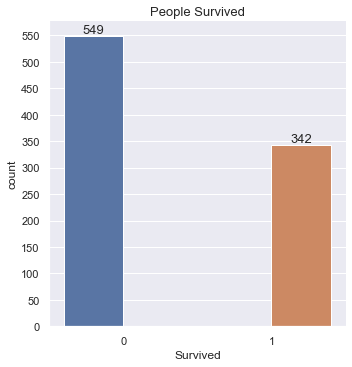

In [270]:
ax = sns.catplot(x='Survived', data=df, hue='Survived', kind='count' )

ax1 = ax.facet_axis(0, 0)
for c in ax1.containers:
    ax1.bar_label(c, fontsize=13)
plt.title('People Survived', fontsize=13);
plt.yticks(range(0,600,50));

###  Gender & Survival

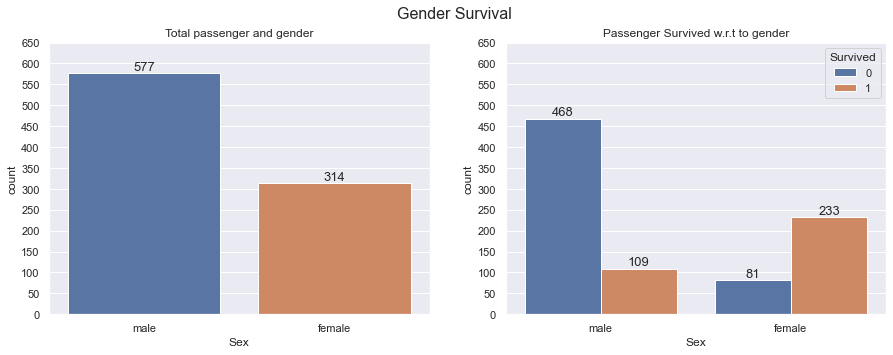

In [271]:
plt.subplots(figsize=(15,5), sharey=True )

ax1=plt.subplot(1,2,2)
ax1 = sns.countplot(x='Sex', hue='Survived', data=df); 
ax1.set_title('Passenger Survived w.r.t to gender')
plt.yticks(range(0,700,50));
for container in ax1.containers:
    plt.bar_label(container, fontsize=13)
    
ax2=plt.subplot(1,2,1)
ax1 = sns.countplot(x='Sex', data=df);
ax1.set_title('Total passenger and gender')
plt.yticks(range(0,700,50));
for container in ax1.containers:
    plt.bar_label(container, fontsize=13)
    
plt.suptitle('Gender Survival', size=16);

### Passenger Survival Class

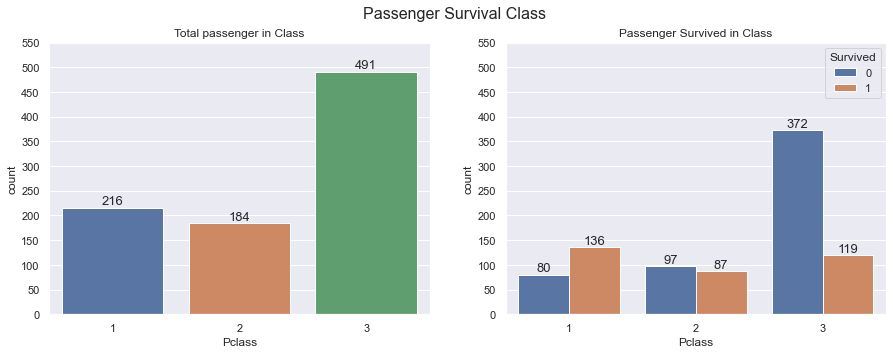

In [272]:
plt.subplots(figsize=(15,5), sharey=True )

ax1=plt.subplot(1,2,2)
ax1 = sns.countplot(x='Pclass', hue='Survived', data=df); 
ax1.set_title('Passenger Survived in Class')
plt.yticks(range(0,600,50));
for container in ax1.containers:
    plt.bar_label(container, fontsize=13)
    
ax2=plt.subplot(1,2,1)
ax1 = sns.countplot(x='Pclass', data=df);
ax1.set_title('Total passenger in Class')
plt.yticks(range(0,600,50));
for container in ax1.containers:
    plt.bar_label(container, fontsize=13)
    
plt.suptitle('Passenger Survival Class', size=16);

### Passenger Class, Gender & Survival

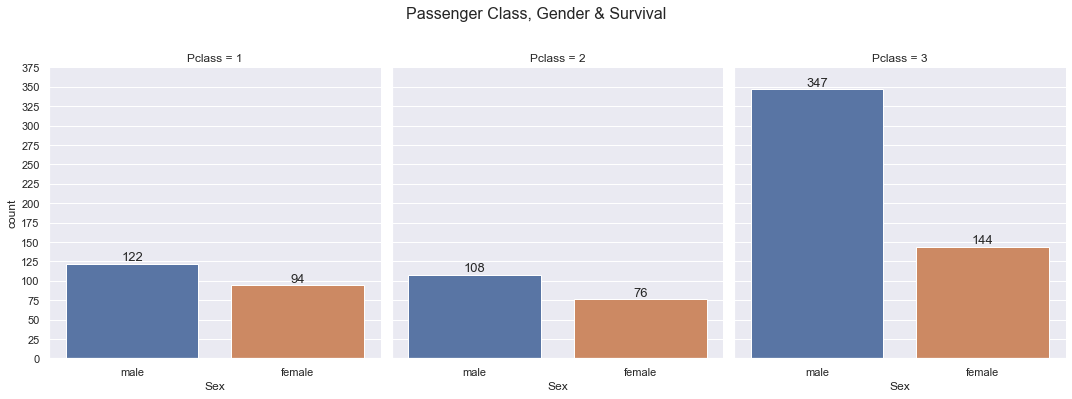

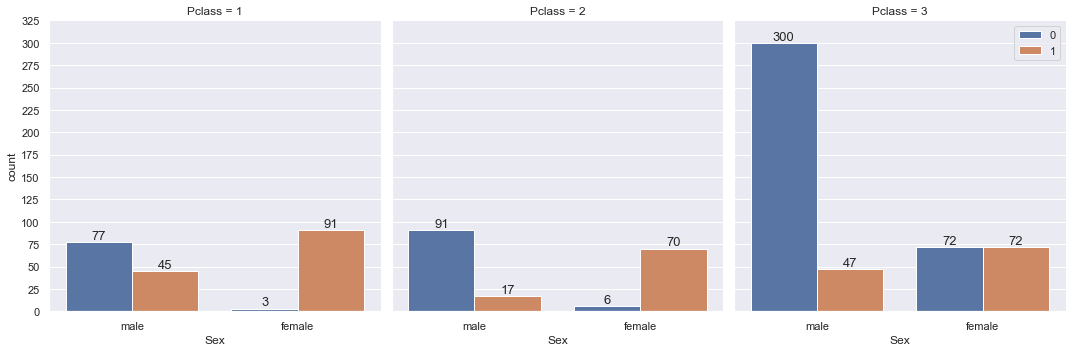

In [273]:
ax1=sns.catplot(x='Sex', col='Pclass', data=df, kind='count');
plt.suptitle('Passenger Class, Gender & Survival',y=1.1, size=16);
plt.yticks(range(0,400,25));
for col in range(3):
    ax = ax1.facet_axis(0, col)
    for c in ax.containers:
        ax.bar_label(c, fontsize=13)

####################################################        
        
ax2 =sns.catplot(x='Sex', col='Pclass', hue='Survived', data=df, kind='count', legend=False);
for col in range(3):
    ax = ax2.facet_axis(0, col)
    for c in ax.containers:
        ax.bar_label(c, fontsize=13)
    
plt.legend(loc=0)
plt.yticks(range(0,350,25));

### 3.2 What's in the name?

**Extracting & Analyzing Titles**

This is called feature engineering where you derive additional columns as per your domain knowledge like creating 'Title in the following example.

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [274]:
import re
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Mr


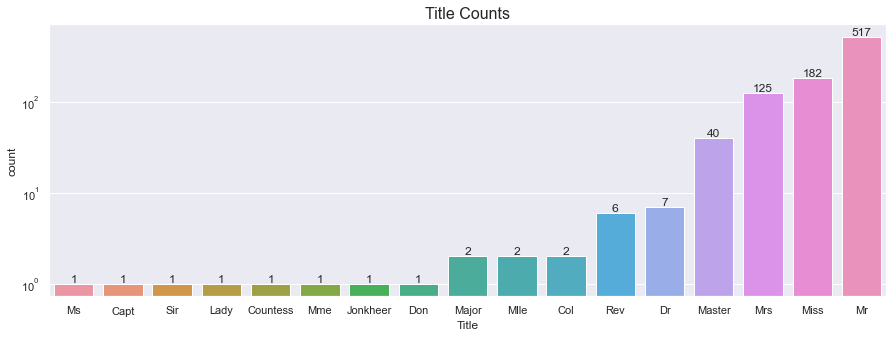

In [275]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Title', data=df,
                  order=df['Title'].value_counts(ascending=True).index);
ax.set_title('Title Counts',fontsize=16)
plt.yscale('log')
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [276]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [277]:
df.loc[(~df['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

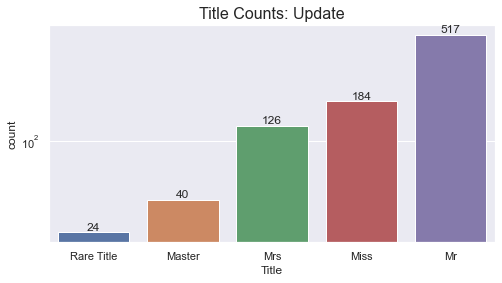

In [278]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Title', data=df,
                  order=df['Title'].value_counts(ascending=True).index);
ax.set_title('Title Counts: Update',fontsize=16)
plt.yscale('log')
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

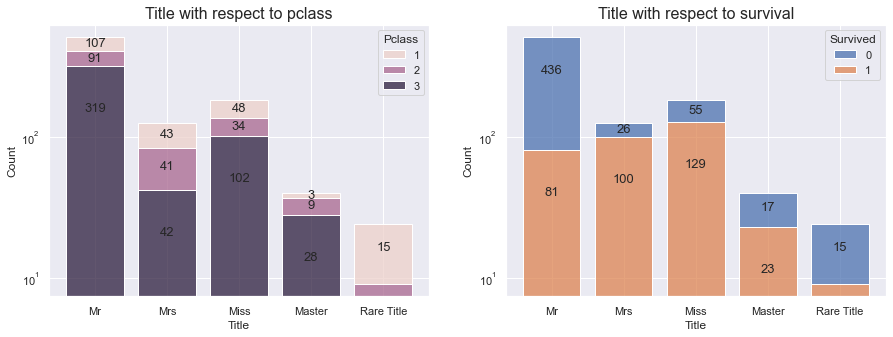

In [279]:
plt.subplots(figsize=(15,5), sharey=True )

#############################################
ax1=plt.subplot(1,2,1)
plt.title('Title with respect to pclass', fontsize=16)
ax1 = sns.histplot(data=df, x="Title", hue="Pclass", multiple="stack", shrink=.8)
plt.yscale('log')

# labels
for c in ax1.containers:
    ax1.bar_label(c, label_type='center',fontsize=13)
    
###############################################
ax2=plt.subplot(1,2,2)

plt.title('Title with respect to survival', fontsize=16)
ax2 = sns.histplot(data=df, x="Title", hue="Survived", multiple="stack", shrink=.8)
plt.yscale('log')

# labels
for c in ax2.containers:
    ax2.bar_label(c, label_type='center',fontsize=13)


### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [280]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,Mr


In [281]:
# Combine all family members
df['Fsize'] = df['SibSp'] + df['Parch']+1

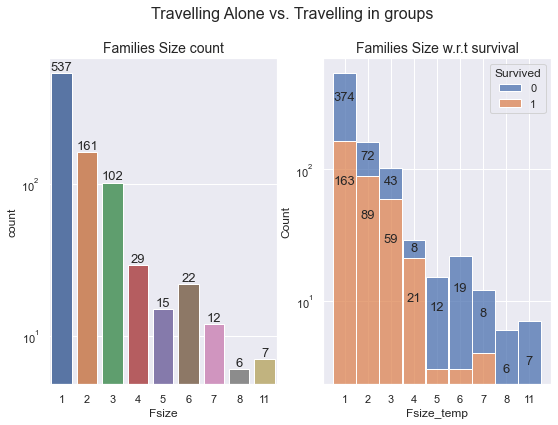

In [282]:
plt.subplots(figsize=(9,6))

plt.suptitle('Travelling Alone vs. Travelling in groups',y=1, size=16);
######################
ax1 = plt.subplot(1,2,1)
plt.title('Families Size count', fontsize=14)
ax1 = sns.countplot(data=df, x='Fsize')
plt.yscale('log')

for cont in ax1.containers:
    plt.bar_label(cont, fontsize=13 )


########################
df= df.sort_values(by=["Fsize"])
df['Fsize_temp'] = df['Fsize'].astype('str') #for object type on X in hist
ax2 = plt.subplot(1,2,2)
plt.title('Families Size w.r.t survival', fontsize=14)
sns.histplot(data=df, x="Fsize_temp", hue="Survived", multiple="stack",shrink=.99)
plt.yscale('log')

for cont in ax2.containers:
    plt.bar_label(cont, fontsize=13, label_type='center' )

# remove Fsize_temp
df.drop(['Fsize_temp'], axis = 1, inplace = True)     


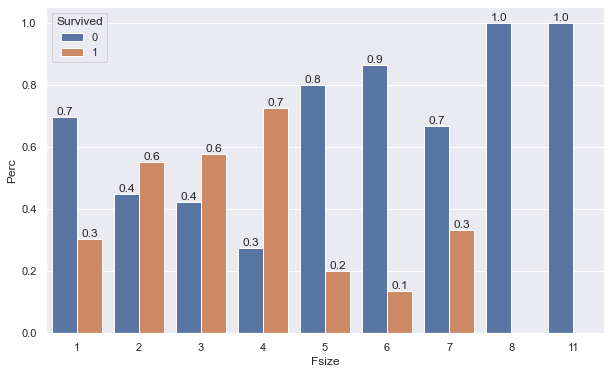

In [283]:
# Same thing as above

temp = df.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(10,6));
ax = sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

for cont in ax.containers:
    plt.bar_label(cont, fontsize=12, fmt='%.1f' )

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

**reset_index()** is a method to reset index of a Data Frame. **reset_index()** method sets a list of integer ranging from 0 to length of data as index.

In [284]:
df.Ticket.nunique()

681

In [285]:
df['Ticket'].value_counts().reset_index()

,index,Ticket
0,CA. 2343,7
1,347082,7
2,1601,7
3,CA 2144,6
4,347088,6
...,...,...
676,350035,1
677,C.A. 6212,1
678,349224,1
679,A/4 45380,1


In [286]:
temp = df['Ticket'].value_counts().reset_index(name='Tsize')
temp

,index,Tsize
0,CA. 2343,7
1,347082,7
2,1601,7
3,CA 2144,6
4,347088,6
...,...,...
676,350035,1
677,C.A. 6212,1
678,349224,1
679,A/4 45380,1


In [287]:
df = df.merge(temp, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q,Mr,1,1
1,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.14,NaN,Q,Miss,1,1
2,682,1,1,"Hassab, Mr. Hammad",male,27.00,0,0,PC 17572,76.73,D49,C,Mr,1,3
3,646,1,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.73,D33,C,Mr,2,3
4,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.73,D33,C,Mrs,2,3


**Task 14:**
Show the countplot on column **'Tsize'** and check how many people are survived and died.

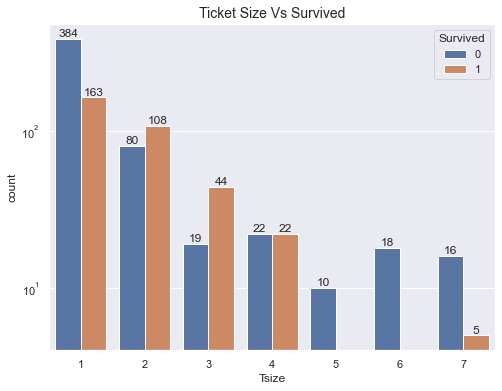

In [293]:
plt.figure(figsize=(8,6))
plt.title("Ticket Size Vs Survived", fontsize=14)
ax=sns.countplot(data=df, x='Tsize', hue='Survived')
plt.yscale('log')

for val in ax.containers:
    plt.bar_label(val, fontsize=12)

In [299]:
temp = df.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

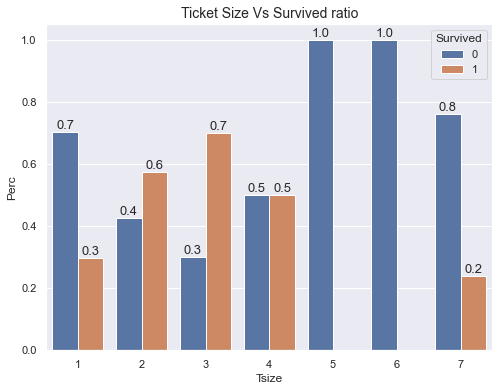

In [301]:
plt.figure(figsize=(8,6))
ax =sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);
plt.title("Ticket Size Vs Survived ratio", fontsize=14)

for cont in ax.containers:
    plt.bar_label(cont, fontsize=13, fmt='%.1f' )

**3.3.3 Consolidating family & friends**

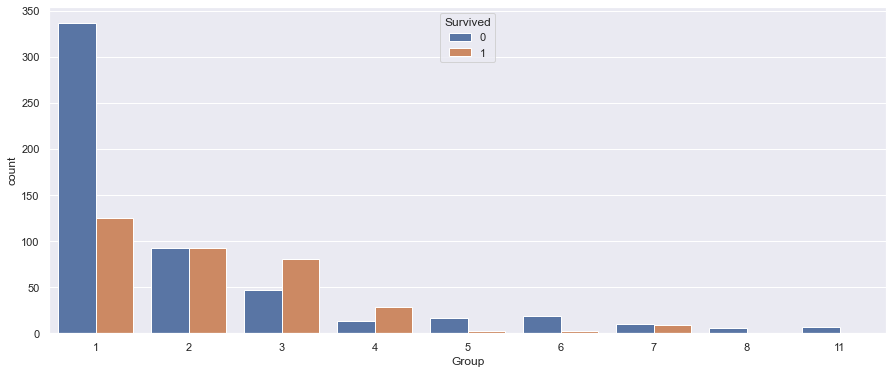

In [302]:
df['Group'] = df[['Tsize', 'Fsize']].max(axis=1)

plt.figure(figsize=(15,6));
sns.countplot(x='Group', hue='Survived', data=df);

In [303]:
df['GrpSize'] = ''
df.loc[df['Group']==1, 'GrpSize'] = df.loc[df['Group']==1, 'GrpSize'].replace('', 'solo')
df.loc[df['Group']==2, 'GrpSize'] = df.loc[df['Group']==2, 'GrpSize'].replace('', 'couple')
df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'] = df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'].replace('', 'group')
df.loc[df['Group']>4, 'GrpSize'] = df.loc[df['Group']>4, 'GrpSize'].replace('', 'large group')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q,Mr,1,1,1,solo
1,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.14,NaN,Q,Miss,1,1,1,solo
2,682,1,1,"Hassab, Mr. Hammad",male,27.00,0,0,PC 17572,76.73,D49,C,Mr,1,3,3,group
3,646,1,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.73,D33,C,Mr,2,3,3,group
4,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.73,D33,C,Mrs,2,3,3,group


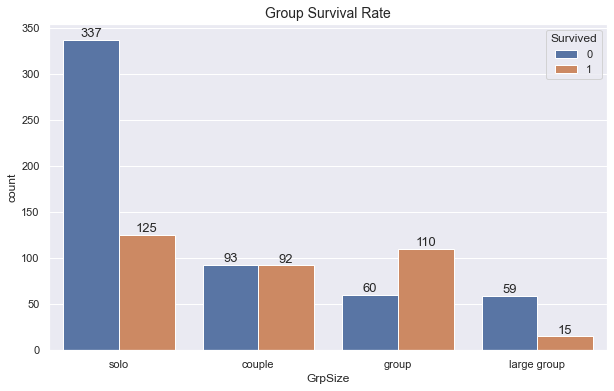

In [310]:
plt.figure(figsize=(10,6));
plt.title('Group Survival Rate', fontsize=14)
ax = sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=df);
for i in ax.containers:
    plt.bar_label(i, fontsize=13)

Applying the same categories for groups on 'dfcomp'

### 3.4 Effect of Fare

**Task 16:**
Check the null values of fare

**Task 17:** 
Applying same changes on **'dfcomp'**

- First check if Fair is zero
- Then replace it with median fare of Pclass

### 3.5 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

***Engineered Features***

In [ ]:
dftitanic.head(2)

**Task 20:**
Check the engineered features for dfcomp

In [ ]:
#Write the code here



## 4. Missing Values

### 4.1 Age

**Task 21:**
Check if there is any null in the column 'Age'

In [ ]:
#Write code here



Creating Age categories

**Task 22:**
Replace missing Age & Fair values in **'dfcomp'**

In [ ]:
#Write the code for filling in the values with median




Checking the null values in 'Age' column again!

In [ ]:
dfcomp['Age'].isnull().sum()

Checking the **pclass** and **title** for which the null value exists

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()),'Pclass':'Title'] 

Filling in the missing value with the median of the specific **pclass**

In [ ]:
dfcomp.loc[(dfcomp['Age'].isnull()) & (dfcomp['Pclass'] == 3) & (dfcomp['Title'] == 'Rare Title'), 'Age'] = dfcomp.loc[(dfcomp['Title'] == 'Rare Title') & (dfcomp['Pclass'] == 3), 'Age'].median()

**Task 23:**
Repeat the above procedure for **'Fare'**

In [ ]:
#Write the code to check if there is any null value 



In [ ]:
#Write code to check the pclass and title for which the null value exists



In [ ]:
#Write code to fill in the missing value



In [ ]:
#Assigning the category to the newly added value
dfcomp.loc[dfcomp['Fare']<=10, 'FareCat'] = '0-10'

**Task 24:** Make Categories for Age as following
- If Age is <=16, then category= '0-16' 
- If Age is >16 and Fare is <=32, then category= '16-32'
- If Age is >32 and Fare is <=48, then category= '32-48'
- If Age is >48 and Fare is <=64, then category= '48-64'
- If Agee is >64, then category= '64+'

In [ ]:
#Write the code here 



### 4.2 Embarkment and null values

In [ ]:
dftitanic.describe(include='O')

In [ ]:
dftitanic['Embarked'].isnull().sum()

In [ ]:
dftitanic.loc[(dftitanic['Embarked'].isnull()),'Embarked']='S'

**Task 25:** Check the nulls in 'Embarked' for **'dfcomp'** and see if any value needs to be replaced

In [ ]:
# Write code to check the nulls in Embarked


In [ ]:
#Write the code here to replace


### 4.3 Dropping Cabin

Defining the cabin type

In [ ]:
dftitanic['CabinType'] = dftitanic['Cabin'].str[0]

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='CabinType', hue='Survived', data=dftitanic);

Dropping Cabin

In [ ]:
dftitanic.groupby(['CabinType', 'Pclass'])['Pclass'].count()

In [ ]:
dftitanic.drop('Cabin',axis=1,inplace=True)

**Task 26:** 
Drop cabin from dfcomp

In [ ]:
#Write the code here


**Task 27:** Check missing values in dftitanic

In [ ]:
#Write the code here


**Task 28:** Checking missing values in **'dfcomp'**

In [ ]:
#wrtie the code here


## 5. Feature Selection

In [ ]:
sns.set_context('poster')

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = dftitanic.drop('PassengerId',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

- **'Group'** holds a corelation of 0.9 with **'Fsize'** and **'Tsize'**. So we will remove **'Group'** and **'Tsize'** because related data can be found in **'GrpSize'**.
- **'Fsize'** still has a corelation of 0.9  with **'SibSp'** and 0.8 with **'Parch'**.So we will remove 'Fsize' because **'SibSp'** and **'Parch'** are providing the required information.
- The **'Name'** column can also be removed because **'Title'** has been extracted.
- Similarly **'Age'** and **'Fare'** can also be removed because **'AgeCat'** and **'FareCat'** provide the related information.

So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'


In [ ]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group']

Selecting final features

In [ ]:
dftitanic.drop(drop_features,axis=1,inplace=True)

**Task 29:** Draw the heatmap as shown above and find the co-relation. Also check which features are to be removed.

In [ ]:
#Write the code for heat map here



**Task 30:** Drop the features in dfcomp using **drop_features**

In [ ]:
#Write the code to drop the columns here


Exporting final dataset in csv file

In [ ]:
dftitanic.to_csv('titanic_clean.csv',index=False)

**Task 31:** Export **'dfcomp'** into csv file

In [ ]:
#Write code here
